In [219]:
# Imports
import json
import numpy as np
import plotly.plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import os
import glob2
import re

### Load in data from a single experiment (1 set of parameters)

In [283]:
def load_config_measurements(experiment_dir, replicate_i):

    '''
    This function loads in data from a single experiment given the 
    directory path. Returns a dictionary of a single replicate
    containing: model parameter configurations, distance from queen 
    & from other workers. 
    '''
    
    # Load config.json
    with open(experiment_dir + "/config.json", "r") as f:
        config_dict = json.load(f)
        
    # Pull out params of interest from config.json
    D = config_dict['diffusion_coefficient']
    Q = config_dict['swarm_parameters']['queen_bee_concentration']
    W = config_dict['swarm_parameters']['worker_bee_concentration']
    T = config_dict['swarm_parameters']['worker_bee_threshold']
    
    # Load measurements.json
    with open(experiment_dir + "/data/measurements.json", "r") as f:
        measurements = json.load(f)
        
    # Pull out params of interest from measurements.json
    distance_from_queen = measurements['distance_from_queen']
    distance_from_others = measurements['distance_from_others']
    
    # Create dict 
    parameters = ['diffusion_coefficient', 'queen_bee_concentration',
         'worker_bee_concentration', 'worker_bee_threshold',
         'distance_from_queen', 'distance_from_others']
    values = [D, Q, W, T, distance_from_queen, distance_from_others]
    experiment_dict = dict(zip([p for p in parameters], values))
    outer_dict = {"Replicate {}".format(replicate_i) : experiment_dict}
    
    return outer_dict

In [298]:
# Test above function
experiment_dir = "experiments/run1/experiment0_Q0.01_W0.005_D0.05_T0.001"
d = load_config_measurements(experiment_dir, 1)
d["Replicate 1"]['queen_bee_concentration']

0.01

Store all (10) replicates of a single set of parameters in a dict. Save in a JSON file. Total: 256 JSON files of different parameter combinations. 

In [307]:
# Find folders of the same parameter set across all runs (10 for actual experiment)
all_replicates = []

In [229]:
data_folders = glob2.glob("experiments/run*/*")
data_folders

['experiments/run1/experiment0_Q0.01_W0.005_D0.05_T0.001',
 'experiments/run1/experiment1_Q0.5_W0.005_D0.05_T0.001',
 'experiments/run2/experiment0_Q0.01_W0.005_D0.05_T0.001',
 'experiments/run2/experiment1_Q0.5_W0.005_D0.05_T0.001']

In [237]:
sets_list = next(os.walk('experiments/run1'))[1]
sets_list

['experiment0_Q0.01_W0.005_D0.05_T0.001',
 'experiment1_Q0.5_W0.005_D0.05_T0.001']

^ If data folder contains this name, run the function above and store replicates in a dict. 

In [305]:
data_folder_i = []
for i in range(len(data_folders)):
    found_index = data_folders[i].find(sets_list[0])
    if found_index != -1:
        print(i)
#         print("Found")
        data_folder_i.append(i)

0
2


In [306]:
data_folders[data_folder_i[1]]

'experiments/run2/experiment0_Q0.01_W0.005_D0.05_T0.001'

In [308]:
d2 = load_config_measurements(data_folders[data_folder_i[1]], 1)
d2["Replicate 1"]['queen_bee_concentration']
all_replicates.append(d2)

In [309]:
all_replicates

[{'Replicate 1': {'diffusion_coefficient': 0.05,
   'distance_from_others': [{'average': 2.507559460475991,
     'distances': [0.0,
      1.5824693833932435,
      2.147100416882396,
      3.3601599812254364,
      2.2792831662693804,
      3.135730104880027,
      3.4536939107172717,
      2.5736023380803403,
      2.233368965848603,
      0.4345077792309485,
      2.9957519925513085,
      3.7502560343948304,
      3.350999272428282,
      1.6899620733499412,
      2.8853696507524287,
      2.9589899323274707,
      1.7394310594218594,
      2.48019397918442,
      2.8613534431058305,
      1.2233201808642868,
      2.946575619470039,
      3.149111470484986,
      1.1948441973600665,
      3.063922852496794,
      0.6575824937246199,
      3.001012019554073,
      2.90556802152962,
      2.131570374344551,
      3.2994100192583193,
      1.8790202002631144,
      2.086385238506665,
      1.1222748241376959,
      0.8294337950405268,
      3.1765466309399364,
      2.166576899074809,

### I. Workers' average distance from the queen

In [201]:
# Get average distance from queen over time of a single swarm
average_distances = []
for avg in measurements['distance_from_queen']:
    average_distances.append(avg['average'])    

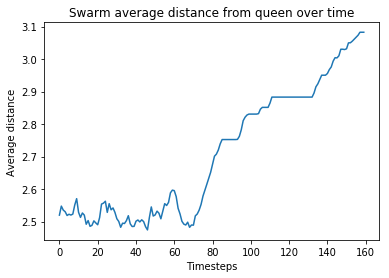

In [202]:
plt.plot(average_distances)
plt.xlabel('Timesteps')
plt.ylabel('Average distance')
plt.title('Swarm average distance from queen over time')
plt.show()

### II. 2D phase diagram showing the plateau values of swarms

In [111]:
queen_concentration = [0.01, 0.255, 0.5]
worker_concentration = [0.005, 0.2525, 0.5]
swarm_end_distance = np.random.random((3, 3))

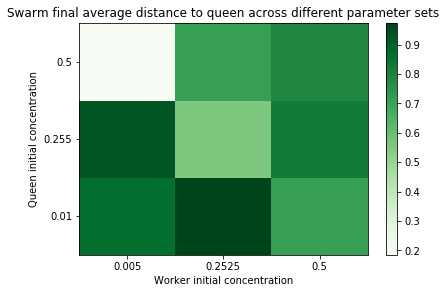

In [176]:
fig, ax = plt.subplots()
#im = ax.imshow(swarm_end_distance)

# We want to show all ticks...
ax.set_xticks(np.arange(len(worker_concentration)))
ax.set_yticks(np.arange(len(queen_concentration)))
# ... and label them with the respective list entries
ax.set_xticklabels(worker_concentration)
ax.set_yticklabels(queen_concentration)

heatmap = ax.pcolor(swarm_end_distance, cmap=plt.cm.Greens)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(swarm_end_distance.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(swarm_end_distance.shape[1])+0.5, minor=False)

ax.set_xlabel('Worker initial concentration')
ax.set_ylabel('Queen initial concentration')

fig.colorbar(heatmap)
fig.tight_layout()
plt.title('Swarm final average distance to queen across different parameter sets')
plt.show()

### III. Distance between workers over time